In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

## погнали [файнтюнить лайк э босс](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e)

либа для проверки

In [2]:
import xgboost_params_checker_custom
checker = xgboost_params_checker_custom.Checker()

In [8]:
def score_update(params, new_params):
    params.update(new_params)
    res = checker.check(params)
    print(new_params, res)
    return res

начальные значения

In [10]:
params = {
    "learning_rate": 0.01,
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 1,
    "gamma": 1
}

### n_estimators

In [11]:
%%time
res_dict = {}
for n_estimators in range(1,10):
    n_estimators = int(n_estimators * 100)
    new_params = {"n_estimators": n_estimators}
    res = score_update(params, new_params)
    res_dict[n_estimators] = res
res_df = pd.DataFrame(res_dict, index=['score', 'time']).T

{'n_estimators': 100} (0.7509862905914515, 1.1558842658996582)
{'n_estimators': 200} (0.7695876908715076, 2.276801824569702)
{'n_estimators': 300} (0.7779211308928452, 3.3753981590270996)
{'n_estimators': 400} (0.7789878375675136, 4.444510459899902)
{'n_estimators': 500} (0.7800545709141828, 5.560178518295288)
{'n_estimators': 600} (0.780254650930186, 6.62023401260376)
{'n_estimators': 700} (0.7803879442555178, 7.683530807495117)
{'n_estimators': 800} (0.7799879309195172, 8.920547485351562)
{'n_estimators': 900} (0.7798545442421817, 9.985188245773315)
CPU times: user 49.9 s, sys: 116 ms, total: 50 s
Wall time: 50 s


(0, 1000)

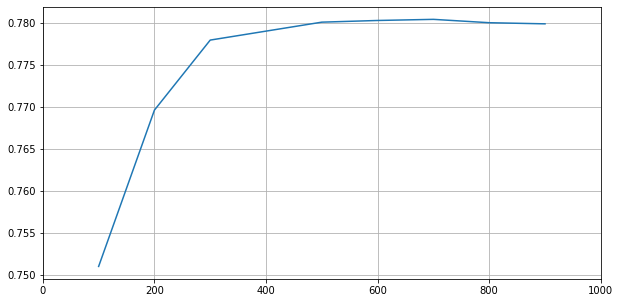

In [12]:
fig,ax = plt.subplots(figsize=(10,5))
res_df["score"].plot(ax=ax)
ax.grid()
ax.set_xlim((0, 1000))

In [13]:
params["n_estimators"] = res_df["score"].idxmax()

In [14]:
params

{'learning_rate': 0.01,
 'max_depth': 3,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'gamma': 1,
 'n_estimators': 700}

### max_depth

In [15]:
%%time
res_dict = {}
for max_depth in range(3,9):
    new_params = {"max_depth": max_depth}
    res = score_update(params, new_params)
    res_dict[max_depth] = res
res_df = pd.DataFrame(res_dict, index=['score', 'time']).T

{'max_depth': 3} (0.7803879442555178, 8.069283246994019)
{'max_depth': 4} (0.7801879175835168, 9.921100854873657)
{'max_depth': 5} (0.7804546642661866, 11.66451382637024)
{'max_depth': 6} (0.7805879842635194, 14.52485966682434)
{'max_depth': 7} (0.7819215843168634, 16.736493587493896)
{'max_depth': 8} (0.7799880109355204, 19.459327220916748)
CPU times: user 1min 19s, sys: 128 ms, total: 1min 20s
Wall time: 1min 20s


(0, 10)

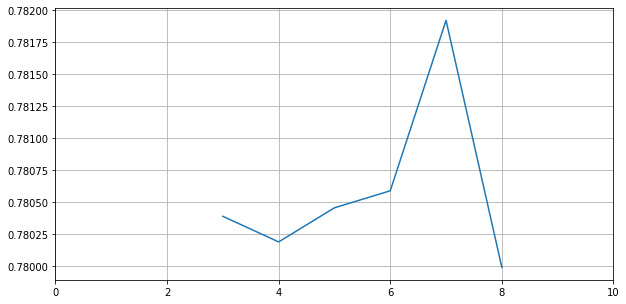

In [16]:
fig,ax = plt.subplots(figsize=(10,5))
res_df["score"].plot(ax=ax)
ax.grid()
ax.set_xlim((0, 10))

In [17]:
params["max_depth"] = res_df["score"].idxmax()

In [18]:
params

{'learning_rate': 0.01,
 'max_depth': 7,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'gamma': 1,
 'n_estimators': 700}

### max_depth через hyperopt

In [24]:
def validate_params(params):
    if "max_depth" in params:
        params["max_depth"] = max(1, params["max_depth"])
    return params

In [29]:
orig_params = {
    'learning_rate': 0.01,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'gamma': 1,
    'n_estimators': 700
}
def check(new_params):
    params = orig_params.copy()
    new_params = validate_params(new_params)
    score, _ = score_update(params, new_params)
    return {'loss': 1 - score, 'status': STATUS_OK}

In [30]:
space = {
    'max_depth': hp.randint('max_depth', 10)
}
trials = Trials()
best = fmin(fn=check, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

{'max_depth': 9}                                    
(0.7785878775755152, 20.74110436439514)             
{'max_depth': 3}                                                              
(0.7803879442555178, 7.49679970741272)                                        
{'max_depth': 6}                                                              
(0.7805879842635194, 13.90901231765747)                                       
{'max_depth': 8}                                                              
(0.7799880109355204, 18.744935512542725)                                      
{'max_depth': 6}                                                              
(0.7805879842635194, 13.970394372940063)                                      
{'max_depth': 5}                                                              
(0.7804546642661866, 11.765556335449219)                                      
{'max_depth': 1}                                                              
(0.7168495299059812, 4.56

In [31]:
best

{'max_depth': 7}

In [32]:
params.update(best)

In [33]:
params

{'learning_rate': 0.01,
 'max_depth': 7,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'gamma': 1,
 'n_estimators': 700}

тоже самое

### learning_rate, subsample, colsample_bytree, gamma через hyperopt

In [42]:
orig_params

{'learning_rate': 0.01,
 'max_depth': 7,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'gamma': 1,
 'n_estimators': 700}

In [38]:
def get_params(new_params):
    params = orig_params.copy()
    params.update(new_params)
    return params

In [34]:
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'subsample': hp.uniform('subsample', 0.8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    'gamma': hp.choice('gamma', [0, 1, 5]),
    'random_state': 42
}
trials = Trials()
best = fmin(fn=check, space=space, algo=tpe.suggest, max_evals=50, trials=trials, )

{'colsample_bytree': 0.7241986839158022, 'gamma': 5, 'learning_rate': 0.03586563192540378, 'subsample': 0.838581605169884}
(0.78258825098353, 12.691478967666626)              
{'colsample_bytree': 0.4191925382995515, 'gamma': 5, 'learning_rate': 0.08149774070845789, 'subsample': 0.861583185039569}
(0.7791213842768553, 8.526808500289917)                                       
{'colsample_bytree': 0.9138607750757473, 'gamma': 5, 'learning_rate': 0.08874802962592851, 'subsample': 0.8558465835683637}
(0.7799880376075216, 13.711140871047974)                                      
{'colsample_bytree': 0.4455625887174225, 'gamma': 1, 'learning_rate': 0.06133692024932139, 'subsample': 0.9073258446182177}
(0.7724540108021604, 8.970492839813232)                                       
{'colsample_bytree': 0.6938751048279963, 'gamma': 5, 'learning_rate': 0.05529486076480773, 'subsample': 0.8256942262224299}
(0.7813882109755284, 12.457554578781128)                                      
{'colsample_b

(0.7621195705807828, 14.37203335762024)                                        
{'colsample_bytree': 0.9301273634343541, 'gamma': 5, 'learning_rate': 0.07130977026115513, 'subsample': 0.9581302487248639}
(0.7819882909915318, 11.825962543487549)                                       
{'colsample_bytree': 0.7393007355447758, 'gamma': 1, 'learning_rate': 0.021203325834677662, 'subsample': 0.9845041159098558}
(0.7793213042608521, 11.955944538116455)                                       
{'colsample_bytree': 0.7966121734097146, 'gamma': 5, 'learning_rate': 0.05775393226023475, 'subsample': 0.9452660666287578}
(0.7807881442955257, 11.10235595703125)                                        
{'colsample_bytree': 0.8487109990241251, 'gamma': 5, 'learning_rate': 0.052194550738431475, 'subsample': 0.870457752909708}
(0.7815881576315263, 13.791575908660889)                                       
{'colsample_bytree': 0.6132494066024967, 'gamma': 0, 'learning_rate': 0.08782614829432688, 'subsample':

In [41]:
str(get_params(best)).replace("'", '"')

'{"learning_rate": 0.03800072733683825, "max_depth": 7, "subsample": 0.9289896791914763, "colsample_bytree": 0.8720085787303631, "gamma": 2, "n_estimators": 700}'

In [36]:
check(best)

{'colsample_bytree': 0.8720085787303631, 'gamma': 2, 'learning_rate': 0.03800072733683825, 'subsample': 0.9289896791914763} (0.7773876908715076, 12.95749020576477)


{'loss': 0.2226123091284924, 'status': 'ok'}

In [44]:
best_old = {
    'learning_rate': 0.03761835757532629,
    'max_depth': 7,
    'subsample': 0.9558088743691748,
    'colsample_bytree': 0.8606650545577266,
    'gamma': 2,
    'n_estimators': 700
}

In [45]:
str(get_params(best_old)).replace("'", '"')

'{"learning_rate": 0.03761835757532629, "max_depth": 7, "subsample": 0.9558088743691748, "colsample_bytree": 0.8606650545577266, "gamma": 2, "n_estimators": 700}'

In [46]:
check(best_old)

{'learning_rate': 0.03761835757532629, 'max_depth': 7, 'subsample': 0.9558088743691748, 'colsample_bytree': 0.8606650545577266, 'gamma': 2, 'n_estimators': 700} (0.7788545175701808, 12.943805456161499)


{'loss': 0.22114548242981924, 'status': 'ok'}

In [47]:
check({})

{} (0.7819215843168634, 15.893206119537354)


{'loss': 0.21807841568313657, 'status': 'ok'}

ничего крутого, если честно? хуже чем было

### hyperopt'em all!

In [51]:
# {'learning_rate': 0.01,
#  'max_depth': 7,
#  'subsample': 0.8,
#  'colsample_bytree': 1,
#  'gamma': 1,
#  'n_estimators': 700}
orig_params

{'learning_rate': 0.01,
 'max_depth': 7,
 'subsample': 0.8,
 'colsample_bytree': 1,
 'gamma': 1,
 'n_estimators': 700}

In [52]:
def score(params_new):
    params_new['n_estimators'] = int(params_new['n_estimators'])
    return check(new_params)

In [53]:
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'nthread': 4,
    'random_state': 42
}
trials = Trials()
best = fmin(fn=score, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

{'max_depth': 8}                                     
(0.7799880109355204, 19.45007085800171)              
{'max_depth': 8}                                                                
(0.7799880109355204, 18.864766359329224)                                        
{'max_depth': 8}                                                                
(0.7799880109355204, 18.32803988456726)                                         
{'max_depth': 8}                                                                
(0.7799880109355204, 18.26543116569519)                                         
{'max_depth': 8}                                                                
(0.7799880109355204, 18.298739671707153)                                        
{'max_depth': 8}                                                                
(0.7799880109355204, 18.25405478477478)                                         
{'max_depth': 8}                                                                
(

KeyboardInterrupt: 

In [54]:
import json
def save_to_file(fname, params):
    params = params.copy()
    params["author_email"] = "naidenov.aleksei@yandex.ru"
    json_str = str(params).replace("'", '"')
    with open(fname, 'w') as f:
        f.write(json_str)

In [58]:
save_to_file("best.json", best)

In [65]:
# ('naidenov.aleksei@yandex.ru', 0.7769878242315129)

In [63]:
check(best)

{'colsample_bytree': 0.8720085787303631, 'gamma': 2, 'learning_rate': 0.03800072733683825, 'subsample': 0.9289896791914763} (0.7773876908715076, 12.536342859268188)


{'loss': 0.2226123091284924, 'status': 'ok'}

In [59]:
save_to_file("best_old.json", best_old)

In [ ]:
# ('naidenov.aleksei@yandex.ru', 0.7788545175701808)

In [64]:
check(best_old)

{'learning_rate': 0.03761835757532629, 'max_depth': 7, 'subsample': 0.9558088743691748, 'colsample_bytree': 0.8606650545577266, 'gamma': 2, 'n_estimators': 700} (0.7788545175701808, 12.594248294830322)


{'loss': 0.22114548242981924, 'status': 'ok'}

In [80]:
params = {'colsample_bytree': 0.7000000000000001,
 'eta': 0.325,
 'gamma': 0.8500000000000001,
 'max_depth': 5,
 'min_child_weight': 2.0,
 'n_estimators': 101,
 'subsample': 1.0,
  'random_state': 42}

In [81]:
save_to_file("params.json", params)

In [82]:
# ('naidenov.aleksei@yandex.ru', 0.7817214642928586)

In [71]:
check(params)

{'colsample_bytree': 0.7000000000000001, 'eta': 0.325, 'gamma': 0.8500000000000001, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 101, 'subsample': 1.0} (0.7796546909381877, 1.3231525421142578)


{'loss': 0.22034530906181227, 'status': 'ok'}

In [72]:
params1 = {'learning_rate': 0.03761835757532629,
 'max_depth': 7,
 'subsample': 0.9558088743691748,
 'colsample_bytree': 0.8606650545577266,
 'gamma': 2,
 'n_estimators': 700}

In [73]:
save_to_file("params1.json", params1)

In [ ]:
# ('naidenov.aleksei@yandex.ru', 0.7788545175701808)

In [74]:
check(params1)

{'learning_rate': 0.03761835757532629, 'max_depth': 7, 'subsample': 0.9558088743691748, 'colsample_bytree': 0.8606650545577266, 'gamma': 2, 'n_estimators': 700} (0.7788545175701808, 12.873998641967773)


{'loss': 0.22114548242981924, 'status': 'ok'}

где то не соответствие между моей проверкой и валидным чекером

## scikit-optimize

In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 494kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from skopt import gp_minimize
from skopt.space import Real, Integer

In [27]:
# defining the space
space = [
    Real(0.5, 1, name="colsample_bylevel"),
    Real(0.5, 1, name="colsample_bytree"),
    Real(0.01, 1, name="gamma"),
    Real(0.0001, 1, name="learning_rate"),
    Real(0.1, 10, name="max_delta_step"),
    Integer(6, 15, name="max_depth"),
    Real(10, 500, name="min_child_weight"),
    Integer(10, 1000, name="n_estimators"),
    Real(0.1, 100, name="reg_alpha"),
    Real(0.1, 100, name="reg_lambda"),
    Real(0.4, 0.7, name="subsample"),
]

In [30]:
curr_model_hyper_params = ['colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step',
                    'max_depth', 'min_child_weight', 'n_estimators', 'reg_alpha', 'reg_lambda', 'subsample']
def score(args):
    params_new = {curr_model_hyper_params[i]: args[i] for i, j in enumerate(curr_model_hyper_params)}
    
    params_new['n_estimators'] = int(params_new['n_estimators'])
    score, ttime = checker.check(params_new)
#     print(params_new, score, ttime)
    return 1 - score

In [31]:
results = gp_minimize(score, space, base_estimator=None, n_calls=200, n_random_starts=10-1, random_state=42)

In [33]:
params_new = {curr_model_hyper_params[i]: results.x[i] for i, j in enumerate(curr_model_hyper_params)}
checker.check(params_new)

(0.7794546375941854, 10.378358364105225)

In [41]:
str(params_new).replace("'", '"')

'{"colsample_bylevel": 1.0, "colsample_bytree": 1.0, "gamma": 0.01, "learning_rate": 0.6831712902863496, "max_delta_step": 10.0, "max_depth": 15, "min_child_weight": 10.0, "n_estimators": 943, "reg_alpha": 31.540650066962566, "reg_lambda": 100.0, "subsample": 0.7}'

In [42]:
params_new = json.loads(str(params_new).replace("'", '"'))

{'colsample_bylevel': 1.0,
 'colsample_bytree': 1.0,
 'gamma': 0.01,
 'learning_rate': 0.6831712902863496,
 'max_delta_step': 10.0,
 'max_depth': 15,
 'min_child_weight': 10.0,
 'n_estimators': 943,
 'reg_alpha': 31.540650066962566,
 'reg_lambda': 100.0,
 'subsample': 0.7}

In [49]:
save_to_file('xgboost_params_skopt.json', params_new)